# Import Libraries

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [28]:
dataset = pd.read_csv('Dataset/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Load Dataset Latih

In [14]:
df = pd.read_csv('Dataset/diabetes_latih.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8,188,78,0,0,47.9,0.137,43,1
1,7,152,88,44,0,50.0,0.337,36,1
2,2,99,52,15,94,24.6,0.637,21,0
3,1,109,56,21,135,25.2,0.833,23,0
4,2,88,74,19,53,29.0,0.229,22,0
...,...,...,...,...,...,...,...,...,...
609,10,101,76,48,180,32.9,0.171,63,0
610,2,122,70,27,0,36.8,0.340,27,0
611,5,121,72,23,112,26.2,0.245,30,0
612,1,126,60,0,0,30.1,0.349,47,1


# Load Dataset uji

In [15]:
X_train = df.values
X_train = np.delete(X_train,8, axis=1)

y_train = df['Outcome'].values

df = pd.read_csv('Dataset/diabetes_uji.csv')

X_test = df.values
X_test = np.delete(X_test,8,axis=1)

y_test = df['Outcome'].values

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
149,2,90,70,17,0,27.3,0.085,22,0
150,1,136,74,50,204,37.4,0.399,24,0
151,4,114,65,0,0,21.9,0.432,37,0
152,9,156,86,28,155,34.3,1.189,42,1


# Data Preprocessing

In [16]:
from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

# Menggunakan 2 fungsi Aktivasi (ReLU & Sigmoid)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(8,)))

pred = model.add(Dense(8, activation='relu'))
pred = model.add(Dense(8, activation='relu'))

In [18]:
model.add(Dense(1, activation='sigmoid'))

pred_model = model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
pred_model

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [22]:
df.isnull().values.any()

False

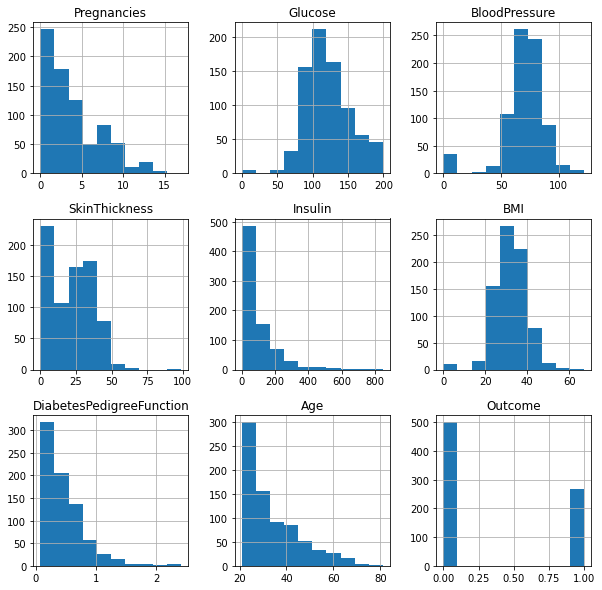

In [23]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [29]:
model.fit(X_train, y_train, epochs=200, verbose=1, batch_size=20)

y_pred = model.predict(X_test)
y_pred = y_pred >= 0.13

Epoch 1/200
31/31 [==============================] - 24s 2ms/step - loss: 0.7422 - accuracy: 0.3493
Epoch 2/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4115
Epoch 3/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6591
Epoch 4/200
31/31 [==============================] - 0s 1ms/step - loss: 0.6797 - accuracy: 0.6438
Epoch 5/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.6770
Epoch 6/200
31/31 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.6571
Epoch 7/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6582 - accuracy: 0.6672
Epoch 8/200
31/31 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.6384
Epoch 9/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6368
Epoch 10/200
31/31 [==============================] - 0s 2ms/step - loss: 0.6474 - accuracy: 0.6563
Epoch 11

31/31 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.7978
Epoch 84/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7967
Epoch 85/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7845
Epoch 86/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7990
Epoch 87/200
31/31 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7721
Epoch 88/200
31/31 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7645
Epoch 89/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7802
Epoch 90/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7568
Epoch 91/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.7840
Epoch 92/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8127
Epoch 93/200


31/31 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7518
Epoch 165/200
31/31 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8157
Epoch 166/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8182
Epoch 167/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7839
Epoch 168/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7794
Epoch 169/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8117
Epoch 170/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.7682
Epoch 171/200
31/31 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7833
Epoch 172/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7866
Epoch 173/200
31/31 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7865
Epoc

In [30]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test, y_pred),3)

0.558

#### Accuracy mendapat 82%
#### Coba dengan menggunakan model lain dan mengulangi Preprocessing data

## Coba dengan model lain

# Menggunakan Fitur Scaling MinMaxScaler

In [34]:
dataset_new = dataset

In [35]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[
    ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [36]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [38]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)



# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [39]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [40]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [41]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [42]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [43]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Data model

In [45]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

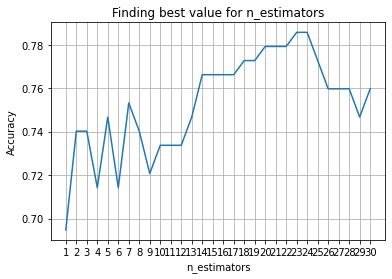

Accuracy:  0.7857142857142857


In [61]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Accuracy: ',acc.values.max())

# Model K-NN

In [47]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

# Model Naive Bayes 

In [48]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

# Model Support Vector Classifier

In [49]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [52]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)

# Evaluasi Model

In [53]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)

In [56]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143


# Untuk melihat ke akurat nya 
## Menggunakan Confusion Matrix

In [57]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test, Y_pred_knn)
conf

array([[87, 13],
       [20, 34]], dtype=int64)

<AxesSubplot:>

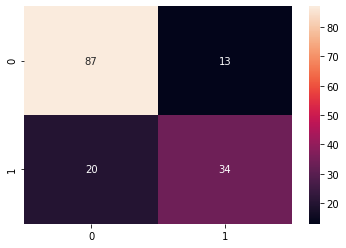

In [59]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(conf), annot=True)

In [60]:
# Hasil Klassifikasi
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

